# **UTS**

Lakukan analisa terhadap data pada [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra) dengan menggunakan klasifikasi
- metode KNN
- metode pohon keputusan (Desision tree)
Proses ...

## **Metode KNN**

In [27]:
# Import Modul
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [28]:
#Membaca Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
cancer = pd.read_csv(url)
cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [29]:
# Menentukan nilai x dan y
x = cancer.iloc[:, :-1]
y = cancer.loc[:, "Classification"]
y = cancer['Classification'].values

In [31]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
# Menentukan Data Baru dan Prediksinya
x_new = [[50.0,	22.1,	70,	2.7, 0.45, 7.0, 9.7, 7.9, 418.114],
         [48.0,	21.1,	50,	3.1, 0.56, 8.0, 8.59, 7.9, 508.7]]
y_predict = knn.predict(x_new)

print(y_predict[0])
print(y_predict[1])

2
1


## **Metode Decision Tree**

In [37]:
# Import Modul
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

In [38]:
# Scalling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
# Decision Tree Classifier
clsf = tree.DecisionTreeClassifier(criterion="entropy")
clsf = clsf.fit(x_train_scaled, y_train)

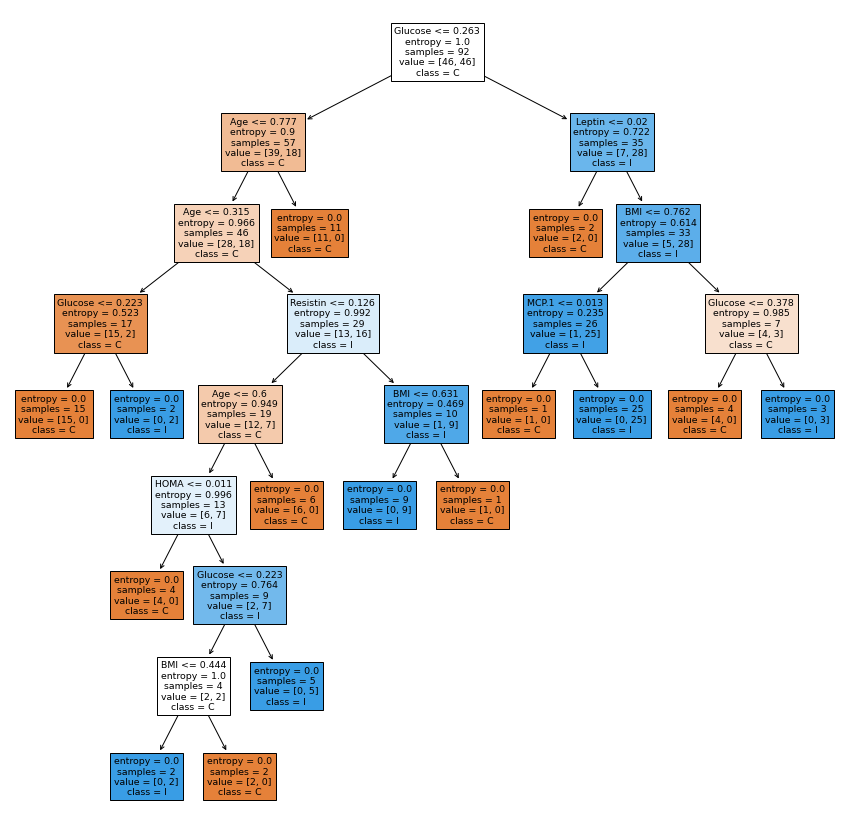

In [43]:
# Membuat Grafik Decision Tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clsf, feature_names=list(cancer.columns.values)[:9], class_names=list(cancer.columns.values)[9] ,filled=True)

In [46]:
# Menampilkan Skor dan Data Uji
print("Data Train : ", clsf.score(x_train_scaled, y_train))
print("Data Test : ", clsf.score(x_test_scaled, y_test))

Data Train :  1.0
Data Test :  0.875
